In [1]:
MovingAveDays = 5 #adjust this as desired...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale = 1.1)

In [80]:
#get the data from CSSE at Johns Hopkins University's Github
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Set up continents

In [81]:
#countries in continents - adjust as needed
Africa = ['Algeria', 'Canary Islands ', 'Ceuta ', 'Egypt', 'Libya', 'Madeira ', 'Melilla ',
        'Morocco', 'Sudan', 'Tunisia', 'Western Sahara', 'Burundi', 'Comoros', 'Djibouti',
        'Eritrea', 'Ethiopia', 'French Southern and Antarctic Lands ', 'Kenya', 'Madagascar',
        'Malawi', 'Mauritius', 'Mayotte ', 'Mozambique', 'Réunion ', 'Rwanda', 'Seychelles',
        'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Angola', 'Cameroon',
        'Central African Republic', 'Chad', 'Republic of the Congo',
        'Congo (Brazzaville)', 'Congo (Kinshasa)','Equatorial Guinea', 'Gabon',
        'São Tomé and Príncipe', 'Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'Zambia',
        'Zimbabwe', 'South Africa', 'Benin', 'Burkina Faso', 'Cape Verde', 'Gambia, The',
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Liberia', 'Mali', 'Mauritania',
        'Niger', 'Nigeria', 'Saint Helena, Ascension and Tristan da Cunha ', 'Senegal',
        'Sierra Leone', 'Togo', 'Cabo Verde', "Cote d'Ivoire",'Mayotte','The Gambia',
         'Gambia', 'Sao Tome and Principe']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
        'Cambodia', 'China', 'Cyprus', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran',
        'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos',
        'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Korea, North',
        'Oman', 'Pakistan', 'Palestine', 'Papua New Guinea', 'Philippines', 'Qatar', 'Russia',
        'Saudi Arabia', 'Singapore', 'Korea, South', 'Sri Lanka', 'Syria', 'Taiwan*',
        'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
        'Uzbekistan', 'Vietnam', 'Yemen', 'Cruise Ship','Timor-Leste','Diamond Princess',
        'West Bank and Gaza','Burma']
Europe = ['Albania', 'Andorra', 'Armenia ', 'Austria', 'Azerbaijan ', 'Belarus', 'Belgium',
        'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus ', 'Czech Republic',
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia ', 'Germany', 'Greece',
        'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein',
        'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
        'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia ', 'San Marino',
        'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
        'Ukraine', 'United Kingdom', 'Holy See', 'Czechia', 'Kosovo','Guernsey','Jersey']
OtherNorthAmerica = ['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Barbados',
        'Belize', 'Bermuda', 'Bonaire', 'British Virgin Islands', 'Canada', 'Cayman Islands',
        'Clipperton Island', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic',
        'El Salvador', 'Federal Dependencies of Venezuela', 'Greenland', 'Grenada',
        'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico',
        'Montserrat', 'Nicaragua', 'Nueva Esparta', 'Panama', 'Puerto Rico', 'Saba',
        'San Andrés and Providencia', 'Saint Barthélemy', 'Saint Kitts and Nevis',
        'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon',
        'Saint Vincent and the Grenadines', 'Sint Eustatius', 'Sint Maarten',
        'Trinidad and Tobago', 'Turks and Caicos Islands',
        'United States Virgin Islands','The Bahamas','Bahamas','MS Zaandam']
#adding cruise ships where they are located during pandemic
Oceania = ['Ashmore and Cartier Islands ', 'Australia', 'Coral Sea Islands ', 'New Zealand',
        'Norfolk Island ', 'Australasia', 'Fiji', 'New Caledonia ', 'Papua ', 'West Papua ',
        'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Melanesia',
        'Federated States of Micronesia', 'Guam ', 'Kiribati', 'Marshall Islands', 'Nauru',
        'Northern Mariana Islands ', 'Palau', 'Wake Island ', 'Micronesia', 'American Samoa ',
        'Cook Islands ', 'Easter Island ', 'French Polynesia ', 'Hawaii ', 'Niue ',
        'Pitcairn Islands ', 'Samoa', 'Tokelau ', 'Tonga', 'Tuvalu', 'Wallis and Futuna','Reunion',
        'Guam']
SouthAmerica = ['Argentina', 'Bolivia', 'Bouvet Island', 'Brazil', 'Chile', 'Colombia',
        'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru',
        'South Georgia and the South Sandwich Islands', 'Suriname', 'Uruguay', 'Venezuela']
US = ['US']
Antarctica = ['Antarctica']

In [82]:
#function to check which continent a country is in based on the above
def check_continent(country):
    if country in Africa:
        continent = 'Africa'
    elif country in Antarctica:
        continent = 'Antarctica'
    elif country in Asia:
        continent = 'Asia'
    elif country in Europe:
        continent = 'Europe'
    elif country in OtherNorthAmerica:
        continent = 'Other North America'
    elif country in Oceania:
        continent = 'Oceania'
    elif country in SouthAmerica:
        continent = 'South America'
    elif country in US:
        continent = 'USA'
    else:
        continent = 'Other'
    return continent

In [83]:
#run this to check latest list - if anything appears in output, then add to the countries listed to appropriate continent mappings above
for i in confirmed['Country/Region']:
    if check_continent(i) == 'Other':
        print(i)

In [84]:
#add continent to the data
confirmed['Continent'] = confirmed.apply(lambda x: check_continent(x['Country/Region']), axis=1)
deaths['Continent'] = deaths.apply(lambda x: check_continent(x['Country/Region']), axis=1)
recoveries['Continent'] = recoveries.apply(lambda x: check_continent(x['Country/Region']), axis=1)

C = confirmed.drop(confirmed.columns[[0,1,2,3]], axis = 1)
D = deaths.drop(deaths.columns[[0,1,2,3]], axis = 1)
R = recoveries.drop(recoveries.columns[[0,1,2,3]], axis = 1)
#sum up values to 1 value per day per country
C2 = C.groupby('Continent').sum().transpose()
D2 = D.groupby('Continent').sum().transpose()
R2 = R.groupby('Continent').sum().transpose()
#parse the datetime fields
C2.index = pd.to_datetime(C2.index)
D2.index = pd.to_datetime(D2.index)
R2.index = pd.to_datetime(R2.index)

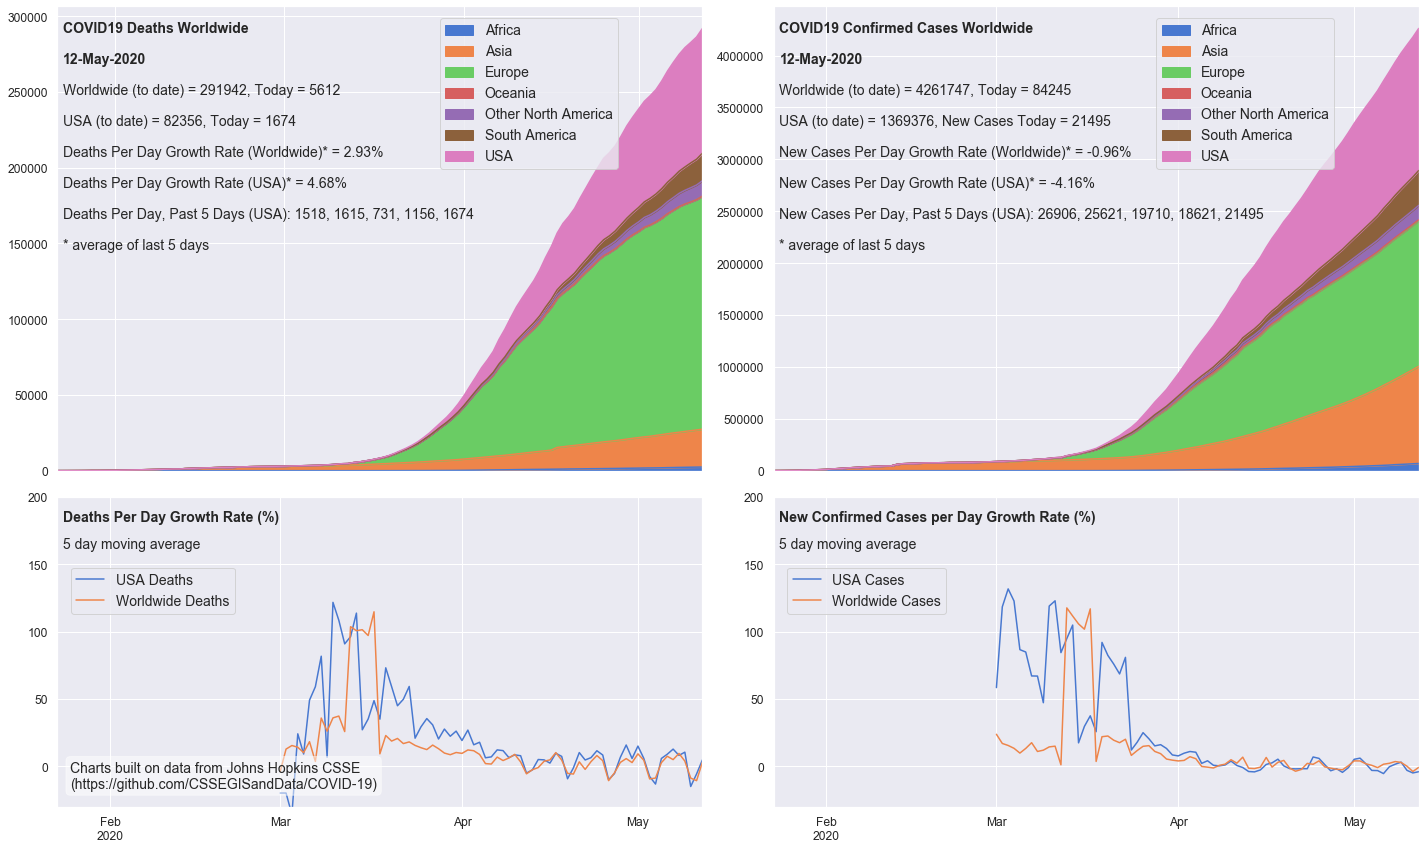

In [85]:
#new area plot

#Prettier plot with aligned x-axes between top and bottom charts, but shield pre-march growth rates since they are noisy
#also, show by continent

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 1.1)

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1.5, 1]})

#latest date in data set
Date = D2.index[-1] 

#Set up the data - deaths
#total number of deaths worldwide, up to the latest date in the data set
WWDeathsToDate = D2.iloc[-1,:].sum() 
#WW deaths per day
WWDeathsPerDay = D2.sum(axis=1)[1:] - D2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWDeathsPerDayGrowthRateMA = WWDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#total US deaths to latest date
USDeathsToDate = D2['USA'][-1] 
#US deaths per day
USDeathsPerDay = D2['USA'][1:] - D2['USA'][:-1].values
#latest US death per day growth rate with moving average
USNewDeathsPerDayGrowthMA = USDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#deaths last 5 days
L5D = USDeathsPerDay[-5:]

#Set up the data - confirmed cases
#total number of confirmed cases worldwide, up to the latest date in the data set
WWCasesToDate = C2.iloc[-1,:].sum() 
#WW new cases per day
WWNewCasesPerDay = C2.sum(axis=1)[1:] - C2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWNewCasesPerDayGrowthRateMA = WWNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#total US confirmed cases to latest date
USCasesToDate = C2['USA'][-1] 
#US confirmed new cases per day
USNewCasesPerDay = C2['USA'][1:] - C2['USA'][:-1].values #new cases per day
#latest US new confirmed cases per day growth rate over moving average
USNewCasesPerDayGrowthMA = USNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US confirmed cases daily growth rate based on moving average
#cases last 5 days
L5C = USNewCasesPerDay[-5:]

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
D2.plot(kind='area', ax=axarr1)
axarr1.legend(loc='upper right', bbox_to_anchor=(0.88, 0.99), shadow=False, ncol=1, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate, "COVID19 Deaths Worldwide", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.86, "Worldwide (to date) = " + str(WWDeathsToDate) + ", Today = " + str(WWDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.79, "USA (to date) = " + str(USDeathsToDate) + ", Today = " + str(USDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.72, "Deaths Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(WWDeathsPerDayGrowthRateMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.65, "Deaths Per Day Growth Rate (USA)* = " + "{:.2f}".format(USNewDeathsPerDayGrowthMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.58, "Deaths Per Day, Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5D[-5],L5D[-4],L5D[-3],L5D[-2],L5D[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot stacked area chart of confirmed cases
C2.plot(kind='area', ax=axarr2)
axarr2.legend(loc='upper right', bbox_to_anchor=(0.88, 0.99), shadow=False, ncol=1, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate, "COVID19 Confirmed Cases Worldwide", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[2], WWCasesToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[2], WWCasesToDate*.86, "Worldwide (to date) = " + str(WWCasesToDate) + ", Today = " + str(WWNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.79, "USA (to date) = " + str(USCasesToDate) + ", New Cases Today = " + str(USNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.72, "New Cases Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(WWNewCasesPerDayGrowthRateMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.65, "New Cases Per Day Growth Rate (USA)* = " + "{:.2f}".format(USNewCasesPerDayGrowthMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.58, "New Cases Per Day, Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5C[-5],L5C[-4],L5C[-3],L5C[-2],L5C[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot death growth rate over time (based on moving agerage)
USNewDeathsPerDayGrowthMAcleaner = USNewDeathsPerDayGrowthMA #don't show growth data before March 1 since messy
USNewDeathsPerDayGrowthMAcleaner[0:38]=None
USNewDeathsPerDayGrowthMAcleaner.plot.line(ax=axarr3,label="USA Deaths")
WWDeathsPerDayGrowthRateMA[38:].plot.line(ax=axarr3,label="Worldwide Deaths")
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 185, 'Deaths Per Day Growth Rate (%)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 165, str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, fontsize=14)
axarr3.set_ylim([-30,200])
axarr3.legend(loc='lower left', bbox_to_anchor=(0.01, 0.6), shadow=False, ncol=1, fontsize=14)
axarr1.get_shared_x_axes().join(axarr1, axarr3)
axarr2.get_shared_x_axes().join(axarr2, axarr4)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
datatext="Charts built on data from Johns Hopkins CSSE\n(https://github.com/CSSEGISandData/COVID-19)"
axarr3.text(0.02, 0.05, datatext, transform=axarr3.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)

#plot confirmed cases growth rate over time (based on moving agerage)
USNewCasesPerDayGrowthMAcleaner = USNewCasesPerDayGrowthMA #don't show growth data before March 1 since messy
USNewCasesPerDayGrowthMAcleaner[0:38]=None
USNewCasesPerDayGrowthMA.plot.line(ax=axarr4,label="USA Cases")
WWNewCasesPerDayGrowthRateMA[38:].plot.line(ax=axarr4,label="Worldwide Cases")
axarr4.text(USNewCasesPerDayGrowthMA.index[1], 185, 'New Confirmed Cases per Day Growth Rate (%)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr4.text(USNewDeathsPerDayGrowthMA.index[1], 165, str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, fontsize=14)
axarr4.set_ylim([-30,200])
axarr4.legend(loc='lower left', bbox_to_anchor=(0.01, 0.6), shadow=False, ncol=1, fontsize=14)

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-covid19-chart.png'
fig.savefig(datestring)

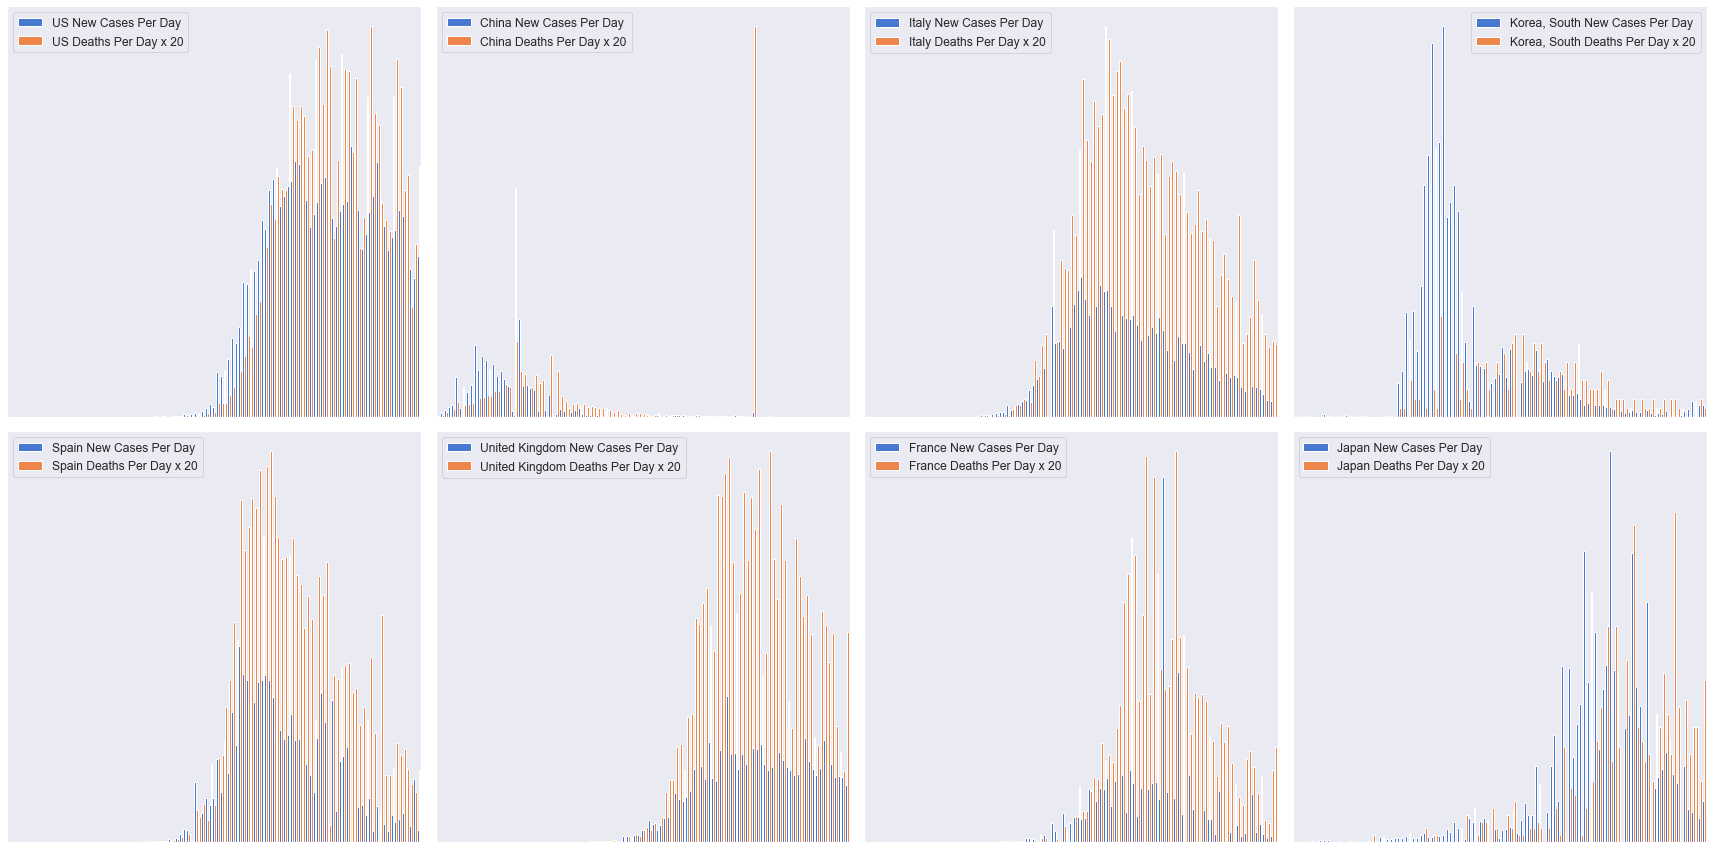

In [86]:
#This plot looks at deaths per day and new cases per day vs. cumulative - for US and China

C3 = confirmed.drop(confirmed.columns[[0,2,3,-1]], axis = 1)
D3 = deaths.drop(deaths.columns[[0,2,3,-1]], axis = 1)
R3 = recoveries.drop(recoveries.columns[[0,2,3,-1]], axis = 1)
#sum up values to 1 value per day per country
C4 = C3.groupby('Country/Region').sum().transpose()
D4 = D3.groupby('Country/Region').sum().transpose()
R4 = R3.groupby('Country/Region').sum().transpose()
#parse the datetime fields
C4.index = pd.to_datetime(C4.index)
D4.index = pd.to_datetime(D4.index)
R4.index = pd.to_datetime(R4.index)

US = pd.DataFrame({'US New Cases Per Day':USNewCasesPerDay,'US Deaths Per Day x 20':USDeathsPerDay*20})

def CvsD(country):
    CountryDeathsPerDay = D4[country][1:] - D4[country][:-1].values
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay,country + ' Deaths Per Day x 20':CountryDeathsPerDay*20})
    Country[Country < 0] = 0 #make any negative values 0 (can't have negative deathe per day)
    return Country

def CvsR(country):
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    CountryRecoveriesPerDay = R4[country][1:] - R4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay, country + ' Recoveries Per Day':CountryRecoveriesPerDay})
    Country[Country < 0] = 0 #make any negative values 0 (can't have negative deathe per day)
    return Country

def CvsDvsR(country):
    CountryDeathsPerDay = D4[country][1:] - D4[country][:-1].values
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    CountryRecoveriesPerDay = R4[country][1:] - R4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay,country + ' Deaths Per Day x 20':CountryDeathsPerDay*20, country + ' Recoveries Per Day':CountryRecoveriesPerDay})
    Country[Country < 0] = 0 #make any negative values 0 (can't have negative deathe per day)
    return Country

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 1.1)

#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsD('US').plot(kind='bar', ax=axarr1, width=1)
CvsD('China').plot(kind='bar', ax=axarr2, width=1)
CvsD('Italy').plot(kind='bar', ax=axarr3, width=1)
CvsD('Korea, South').plot(kind='bar', ax=axarr4, width=1)
CvsD('Spain').plot(kind='bar', ax=axarr5, width=1)
CvsD('United Kingdom').plot(kind='bar', ax=axarr6, width=1)
CvsD('France').plot(kind='bar', ax=axarr7, width=1)
CvsD('Japan').plot(kind='bar', ax=axarr8, width=1)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])

plt.tight_layout()


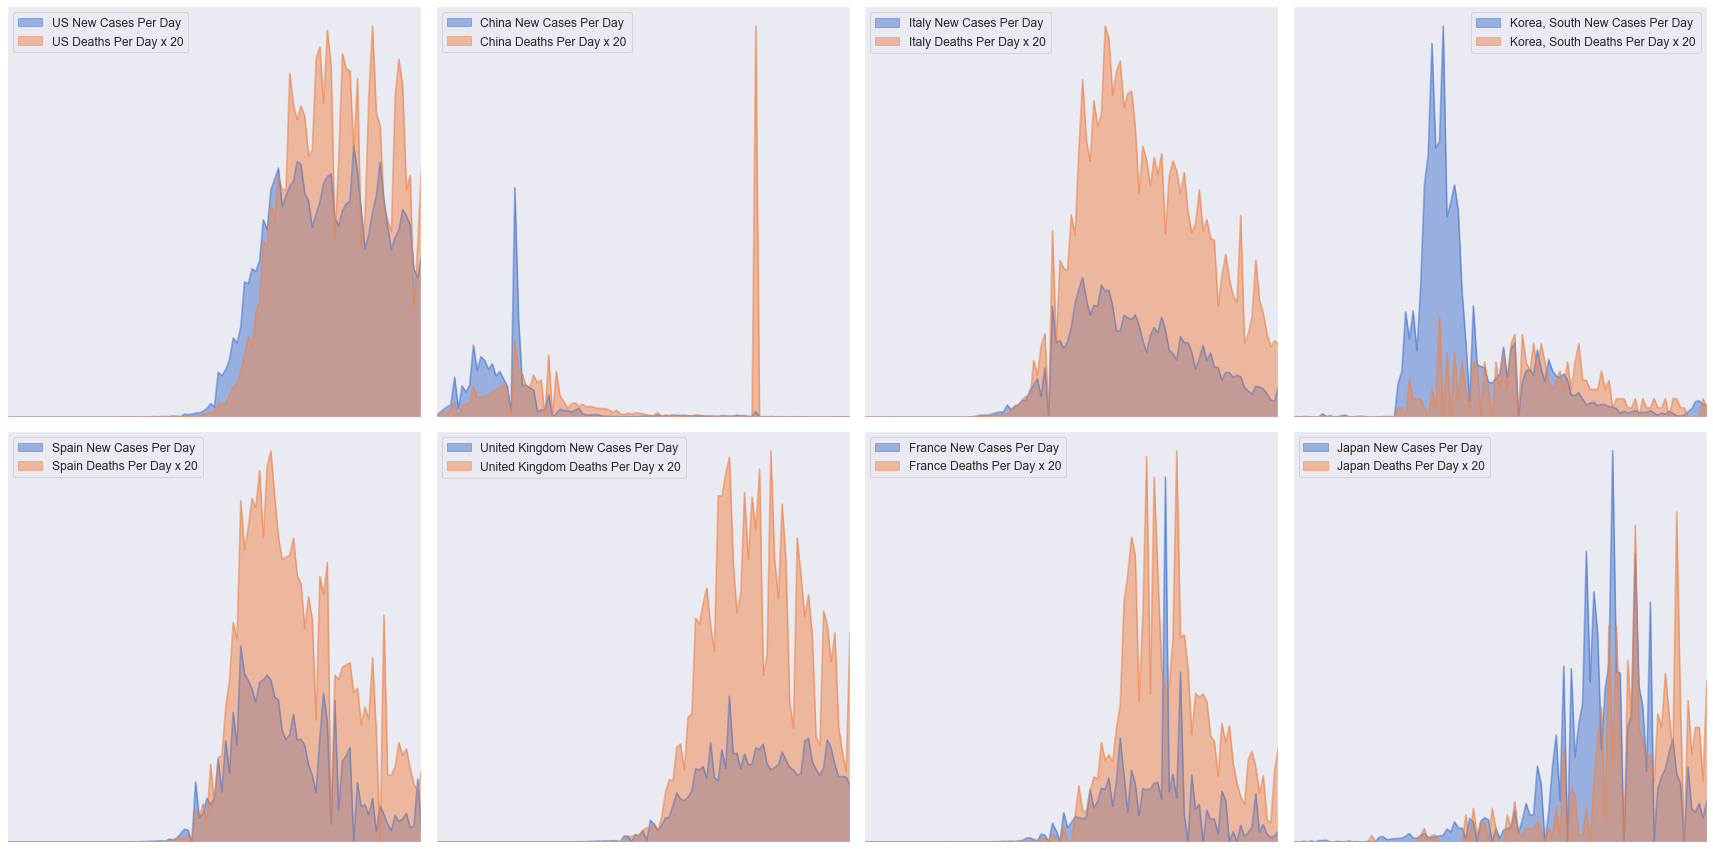

In [87]:
#look at distribution of cases per day vs daths per day (x20 for simple visual comparison) by date and by country
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsD('US').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsD('China').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsD('Italy').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsD('Korea, South').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsD('Spain').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsD('United Kingdom').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsD('France').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsD('Japan').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-comparison-chart.png'
fig.savefig(datestring)

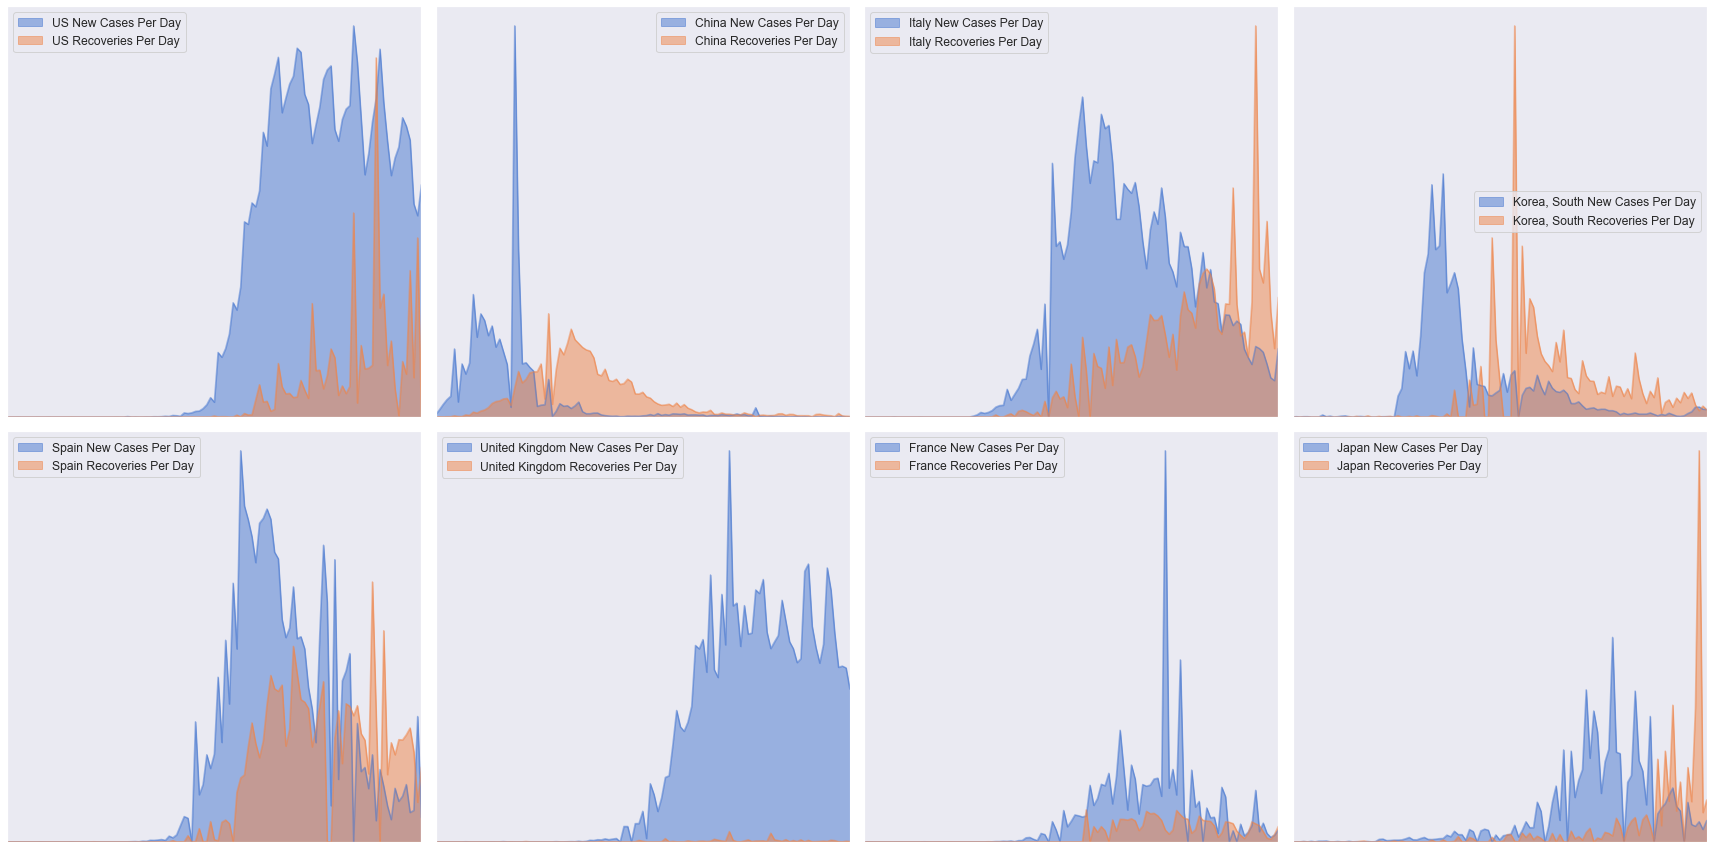

In [88]:
#look at per day distribution of cases vs recovery by date and by country
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsR('US').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsR('China').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsR('Italy').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsR('Korea, South').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsR('Spain').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsR('United Kingdom').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsR('France').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsR('Japan').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-comparison-recovery-chart.png'
fig.savefig(datestring)

In [89]:
#Let's look at US State Data from NY Times (from: https://github.com/nytimes/covid-19-data)
states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
states['date'] = pd.to_datetime(states['date'])

In [90]:
SD = pd.pivot_table(states, values='deaths', index=['date'], columns=['state'], aggfunc=np.sum).fillna(0)
SC = pd.pivot_table(states, values='cases', index=['date'], columns=['state'], aggfunc=np.sum).fillna(0)
def CvsDS(state):
    StateDeathsPerDay = SD[state][1:] - SD[state][:-1].values
    StateCasesPerDay = SC[state][1:] - SC[state][:-1].values
    State = pd.DataFrame({state + ' New Cases Per Day':StateCasesPerDay,state + ' Deaths Per Day x 20':StateDeathsPerDay*20})
    State[State < 0] = 0
    return State

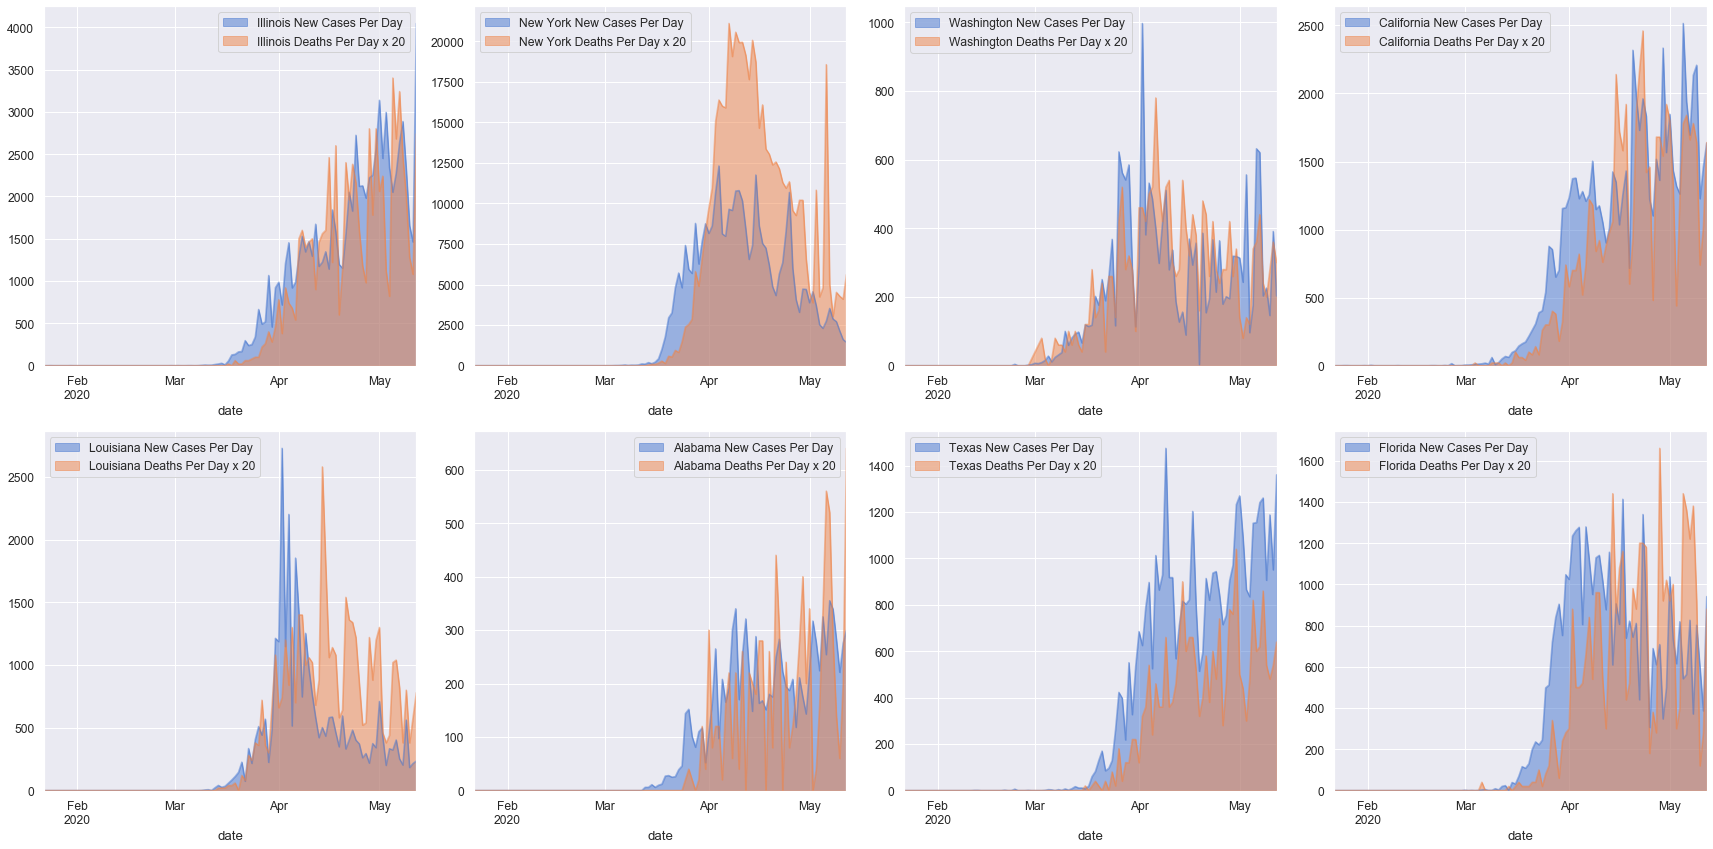

In [91]:
#look at per day distribution of cases vs recovery by date and by select US states
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsDS('Illinois').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsDS('New York').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsDS('Washington').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsDS('California').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsDS('Louisiana').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsDS('Alabama').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsDS('Texas').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsDS('Florida').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-covid19-states.png'
fig.savefig(datestring)

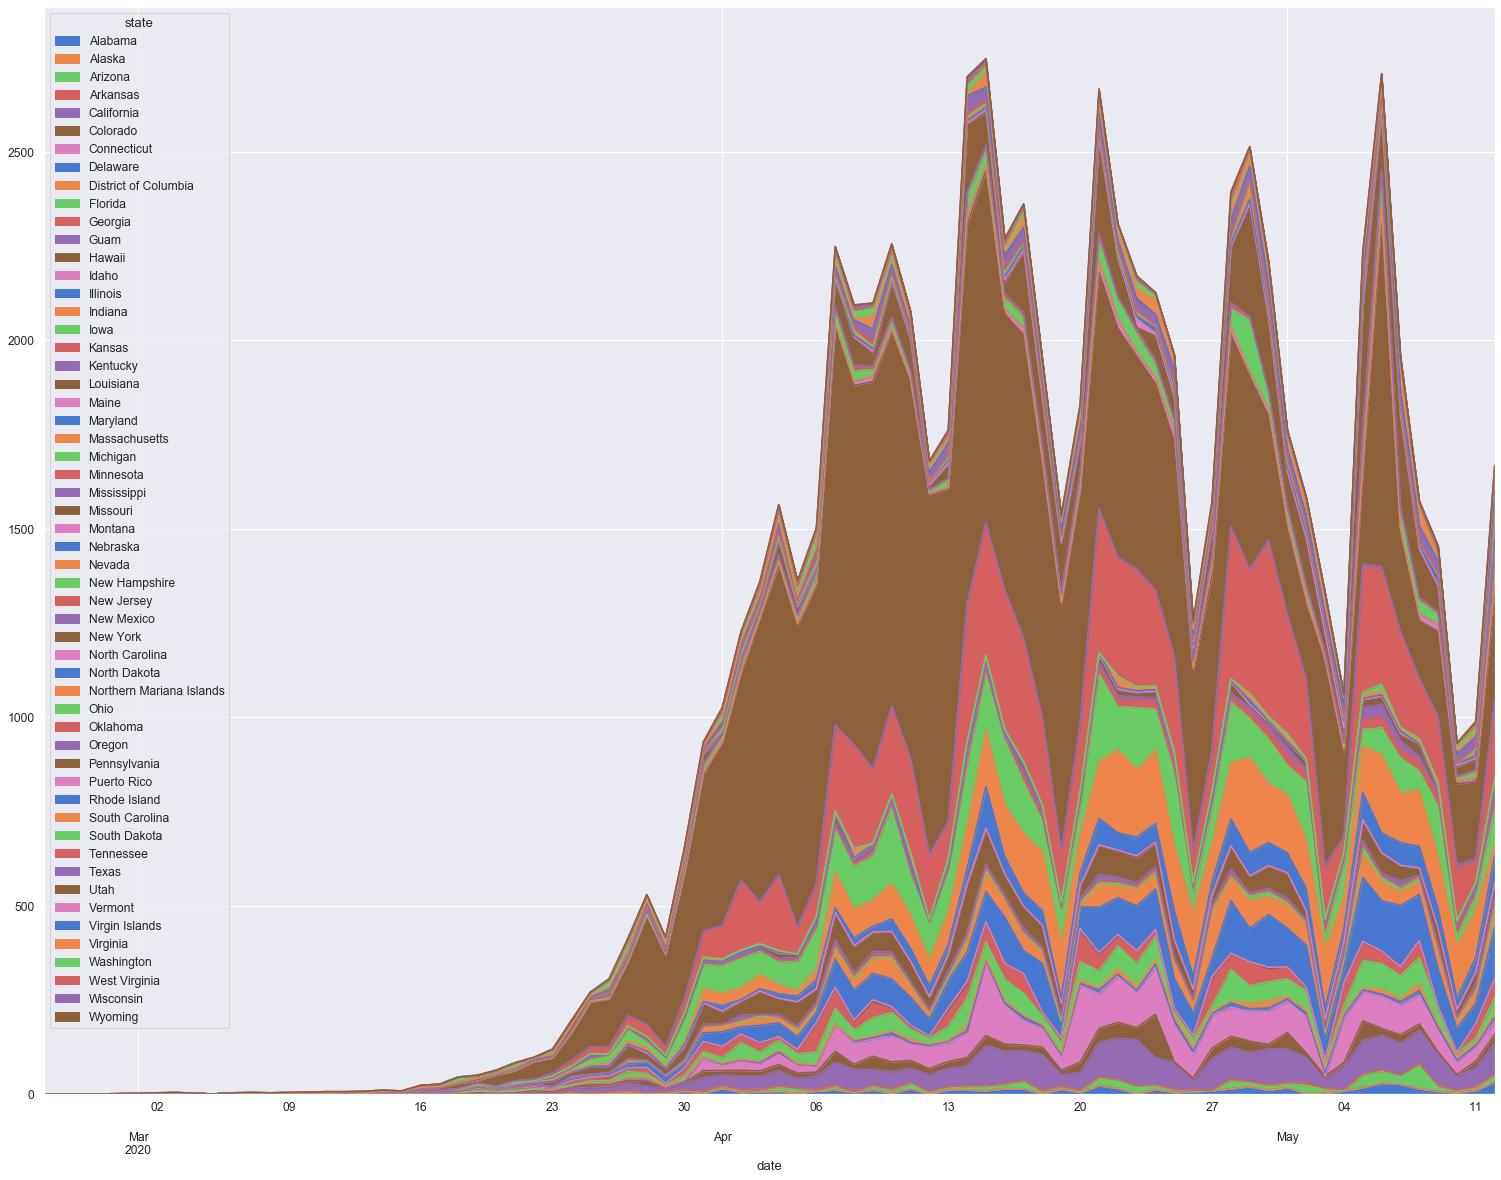

In [92]:
#let's add a cumulative area daily case & death plot from March 1st, state by state
SD2=SD.copy()

for state in SD2.columns:
    SD2[state] = SD2[state][1:] - SD2[state][:-1].values
    SD2[SD2 < 0] = 0 #make any negative values 0 (can't have negative deathe per day)

SD2[35:].plot(kind='area', figsize=(26, 20))


In [93]:
#what is the party of governors in each state? Correlation with lock-downs?
RedState = ['Alabama','Alaska','Arizona','Arkansas','Florida','Georgia','Idaho',
            'Indiana','Iowa','Maryland','Massachusetts','Mississippi','Missouri',
            'Nebraska','New Hampshire','North Dakota','Ohio','Oklahoma',
            'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
            'West Virginia','Wyoming','Northern Mariana Islands']
BlueState = ['California','Colorado','Connecticut','Delaware','Hawaii','Illinois',
            'Kansas','Kentucky','Louisiana','Maine','Michigan','Minnesota','Montana',
            'Nevada','New Jersey','New Mexico','New York','North Carolina','Oregon',
            'Pennsylvania','Rhode Island','Virginia','Washington','Wisconsin',
            'District of Columbia','Guam','Puerto Rico','Virgin Islands']

Text(2020-02-29 00:00:00, 570, 'COVID19 Deaths per Day in USA')

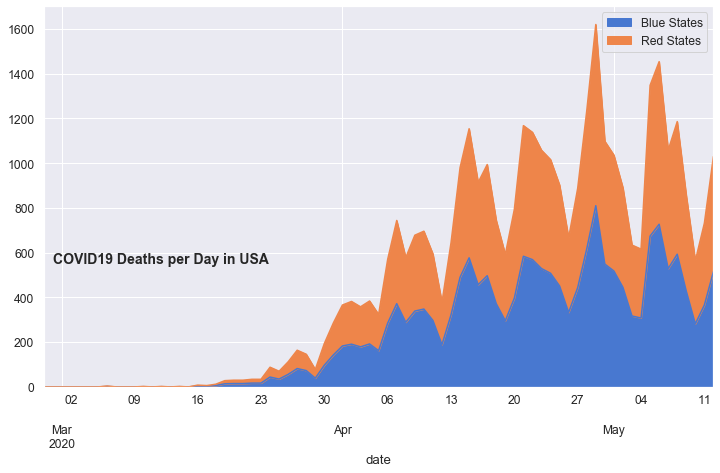

In [94]:
RB_State_Deaths = pd.DataFrame({'Blue States':SD2[RedState].sum(axis=1),'Red States':SD2[RedState].sum(axis=1)})
ax = RB_State_Deaths[38:].plot(kind='area', figsize=(12, 7))
ax.text(RB_State_Deaths.index[39], 570, "COVID19 Deaths per Day in USA", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')


Text(2020-02-29 00:00:00, 570, 'COVID19 Deaths in USA (Cumulative)')

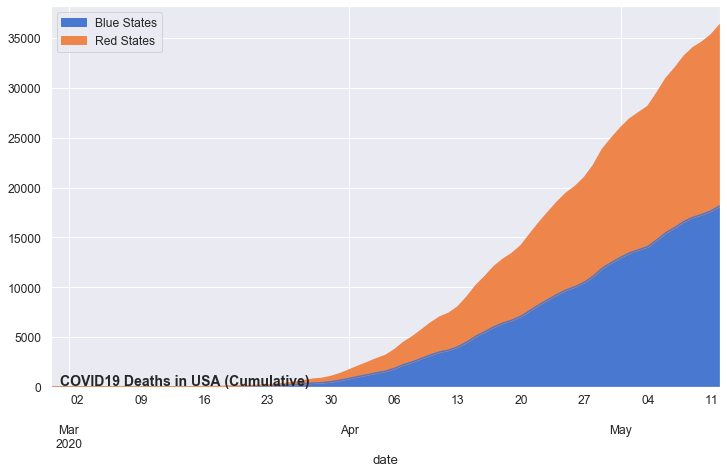

In [95]:
RB_State_Deaths_Cumulative = pd.DataFrame({'Blue States':SD[RedState].sum(axis=1),'Red States':SD[RedState].sum(axis=1)})
ax = RB_State_Deaths_Cumulative[38:].plot(kind='area', figsize=(12, 7))
ax.text(RB_State_Deaths_Cumulative.index[39], 570, "COVID19 Deaths in USA (Cumulative)", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')

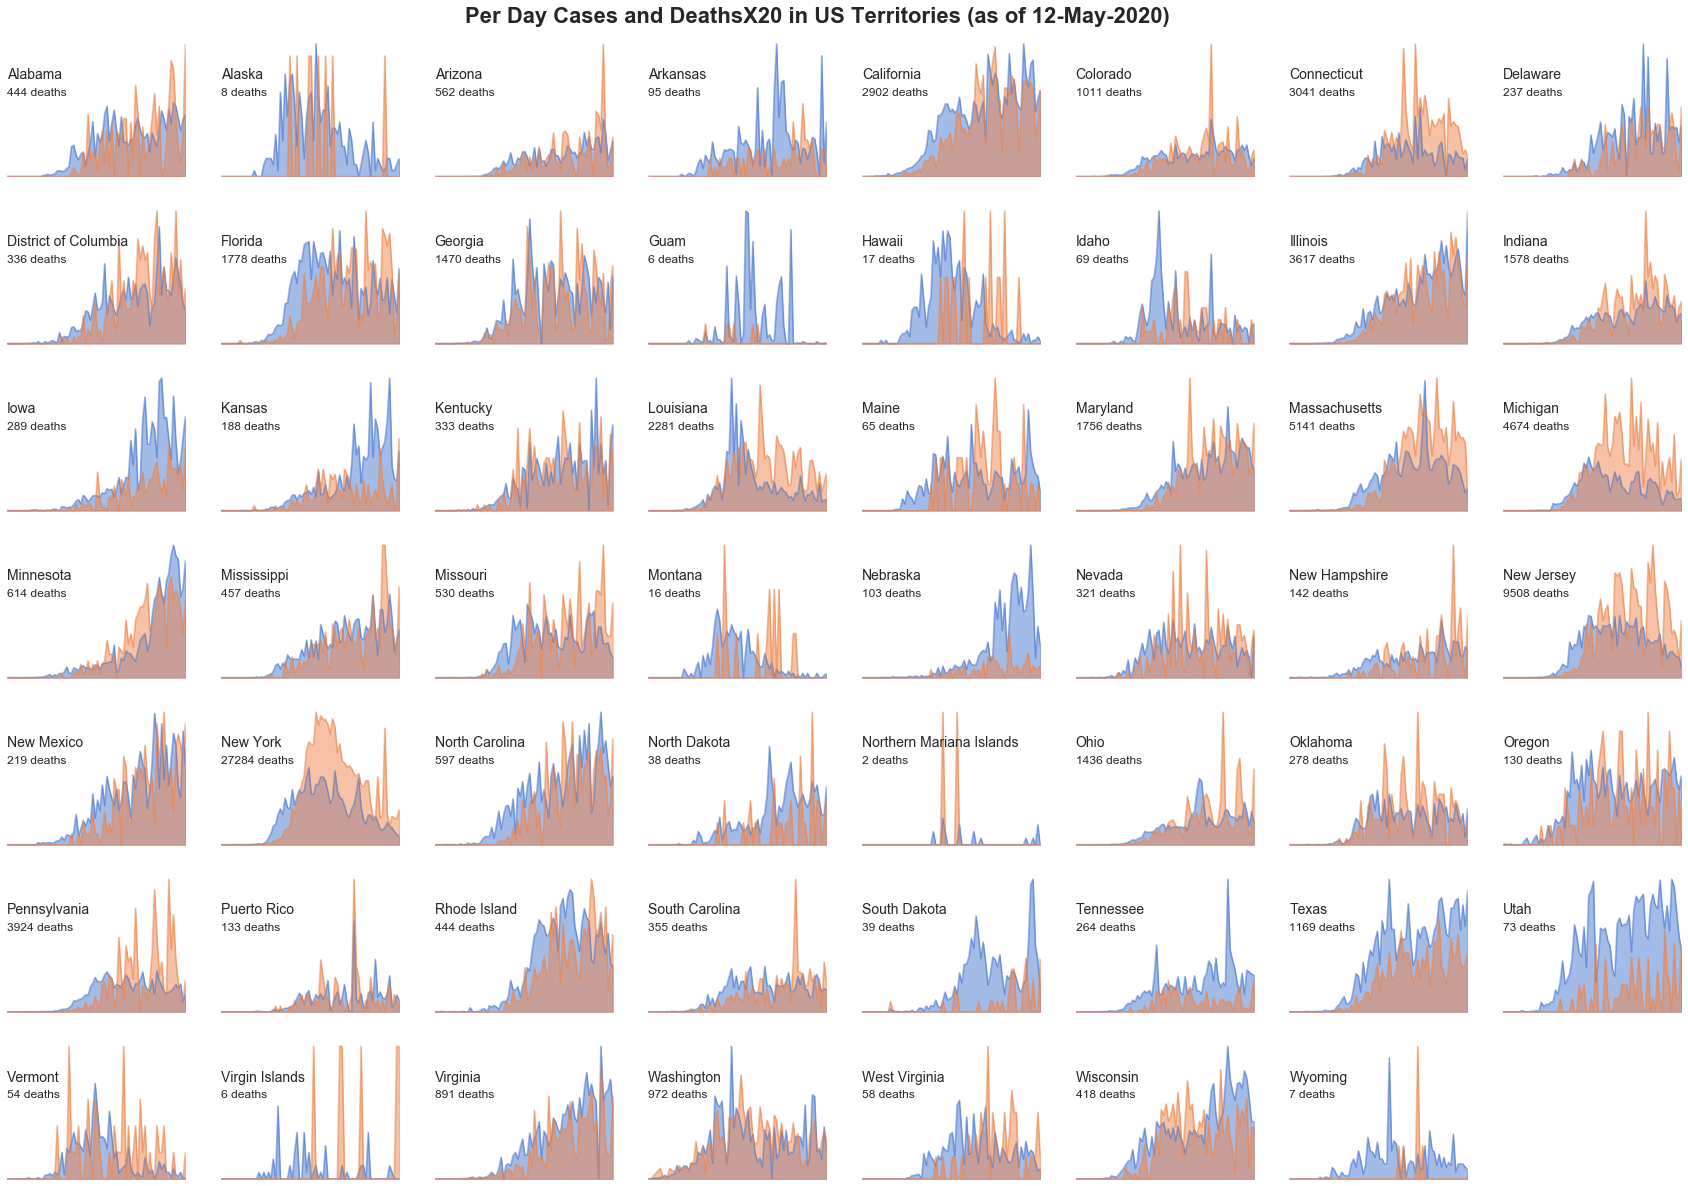

In [96]:
def CvsDS2(state):  #produces data frame starting around March 1
    StateDeathsPerDay = SD[state][1:] - SD[state][:-1].values
    StateCasesPerDay = SC[state][1:] - SC[state][:-1].values
    State = pd.DataFrame({state + ' New Cases Per Day':StateCasesPerDay,state + ' Deaths Per Day x 20':StateDeathsPerDay*20})
    State[State < 0] = 0
    return State[36:]

fig, axes = plt.subplots(nrows=7, ncols=8, figsize=(30, 21))
fig.suptitle(('Per Day Cases and DeathsX20 in US Territories (as of ' + str(Date.strftime("%d-%b-%Y")) + ')'), fontsize=22, y=0.9, fontweight='bold')

i = 0
for row in axes:
    for col in row:
        CvsDS2(SD2.columns[i]).plot(kind='area', stacked=False, ax = col, alpha=0.5)
        col.text(0, 0.7, SD2.columns[i], fontsize=14, transform=col.transAxes)
        col.text(0, 0.58, ("{:.0f}".format(SD2[SD2.columns[i]].sum())+' deaths'), fontsize=12, transform=col.transAxes)
        #col.text(0, 0.46, ('(by ' + str(Date.strftime("%d-%b-%Y")) + ')'), fontsize=11, transform=col.transAxes)
        col.axis('off')
        col.get_legend().remove()
        i = i+1
        if i == 55:
            break    # break here
            
axes[-1, -1].axis('off')
        
sns.set_palette(sns.color_palette("muted",7))

plt.show()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-compare-US-territories.png'
fig.savefig(datestring)

In [97]:
#let's look at county data - from USAFACTS

#load county data from usafacts
county_deaths = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv')
county_confirmed = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv')
county_populations = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')
    
#load county demographics from other sources
#rural vs urban county code data from USDA
county_rural_urban = pd.read_excel('https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2013.xls?v=0')

#county election data from a github repo
county_usa_elections = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-16/master/US_County_Level_Presidential_Results_08-16.csv')

#set indexes
# county_deaths = county_deaths.set_index('countyFIPS')
# county_confirmed = county_confirmed.set_index('countyFIPS')
# county_populations = county_populations.set_index('countyFIPS')


In [98]:
#let's create 2 new columns for each county - 1) urban vs rural, 2) republican vs democrat

def is_rural(code):
    if code < 4:
        return 'Metro'
    else:
        return 'Non-Metro'

county_rural_urban['Type of County'] = county_rural_urban.apply(lambda x: is_rural(x['RUCC_2013']), axis=1)

def party(dem, rep):
    if dem < rep:
        return 'Republican'
    else:
        return 'Democratic'
    
county_usa_elections['Party of County'] = county_usa_elections.apply(lambda x: party(x['dem_2016'],x['gop_2016']), axis=1)


In [99]:
#now let's join tables to see cases and deaths in counties by metro/non-metro and by party leaning

#first for metro/non-metro counties
county_confirmed_bymetro = county_confirmed.copy().drop(county_confirmed.columns[[1,2,3]], axis = 1)
county_deaths_bymetro = county_deaths.copy().drop(county_deaths.columns[[1,2,3]], axis = 1)
UrbRur = county_rural_urban.copy().drop(county_rural_urban.columns[[1,2,3,4,5]], axis = 1).rename(columns={'FIPS': 'countyFIPS'})
county_confirmed_bymetro = county_confirmed_bymetro.set_index('countyFIPS').join(UrbRur.set_index('countyFIPS'))
county_deaths_bymetro = county_deaths_bymetro.set_index('countyFIPS').join(UrbRur.set_index('countyFIPS'))
CCmetro = county_confirmed_bymetro.groupby('Type of County').sum().transpose()
CDmetro = county_deaths_bymetro.groupby('Type of County').sum().transpose()
#the above is cumulative - let's look at  confirmed cases & deaths per day
CCmetroPD = CCmetro.copy()
CDmetroPD = CDmetro.copy()
CCmetroPD['Metro'] = CCmetroPD['Metro'][1:] - CCmetroPD['Metro'][:-1].values
CDmetroPD['Metro'] = CDmetroPD['Metro'][1:] - CDmetroPD['Metro'][:-1].values
CCmetroPD['Non-Metro'] = CCmetroPD['Non-Metro'][1:] - CCmetroPD['Non-Metro'][:-1].values
CDmetroPD['Non-Metro'] = CDmetroPD['Non-Metro'][1:] - CDmetroPD['Non-Metro'][:-1].values
CCmetroPD = CCmetroPD.replace([np.inf, -np.inf], np.nan).fillna(0)
CDmetroPD = CDmetroPD.replace([np.inf, -np.inf], np.nan).fillna(0)
CCmetroPD[CCmetroPD < 0] = 0
CDmetroPD[CDmetroPD < 0] = 0


#next republican vs democratic voting counties
county_confirmed_byparty = county_confirmed.copy().drop(county_confirmed.columns[[1,2,3]], axis = 1)
county_deaths_byparty = county_deaths.copy().drop(county_deaths.columns[[1,2,3]], axis = 1)
Party = county_usa_elections.copy().drop(county_usa_elections.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]], axis = 1).rename(columns={'fips_code': 'countyFIPS'})
county_confirmed_byparty = county_confirmed_byparty.set_index('countyFIPS').join(Party.set_index('countyFIPS'))
county_deaths_byparty = county_deaths_byparty.set_index('countyFIPS').join(Party.set_index('countyFIPS'))
CCparty = county_confirmed_byparty.groupby('Party of County').sum().transpose()
CDparty = county_deaths_byparty.groupby('Party of County').sum().transpose()
#the above is cumulative - let's look at  confirmed cases & deaths per day
CCpartyPD = CCparty.copy()
CDpartyPD = CDparty.copy()
CCpartyPD['Democratic'] = CCpartyPD['Democratic'][1:] - CCpartyPD['Democratic'][:-1].values
CDpartyPD['Democratic'] = CDpartyPD['Democratic'][1:] - CDpartyPD['Democratic'][:-1].values
CCpartyPD['Republican'] = CCpartyPD['Republican'][1:] - CCpartyPD['Republican'][:-1].values
CDpartyPD['Republican'] = CDpartyPD['Republican'][1:] - CDpartyPD['Republican'][:-1].values
CCpartyPD = CCpartyPD.replace([np.inf, -np.inf], np.nan).fillna(0)
CDpartyPD = CDpartyPD.replace([np.inf, -np.inf], np.nan).fillna(0)
CCpartyPD[CCpartyPD < 0] = 0
CDpartyPD[CDpartyPD < 0] = 0


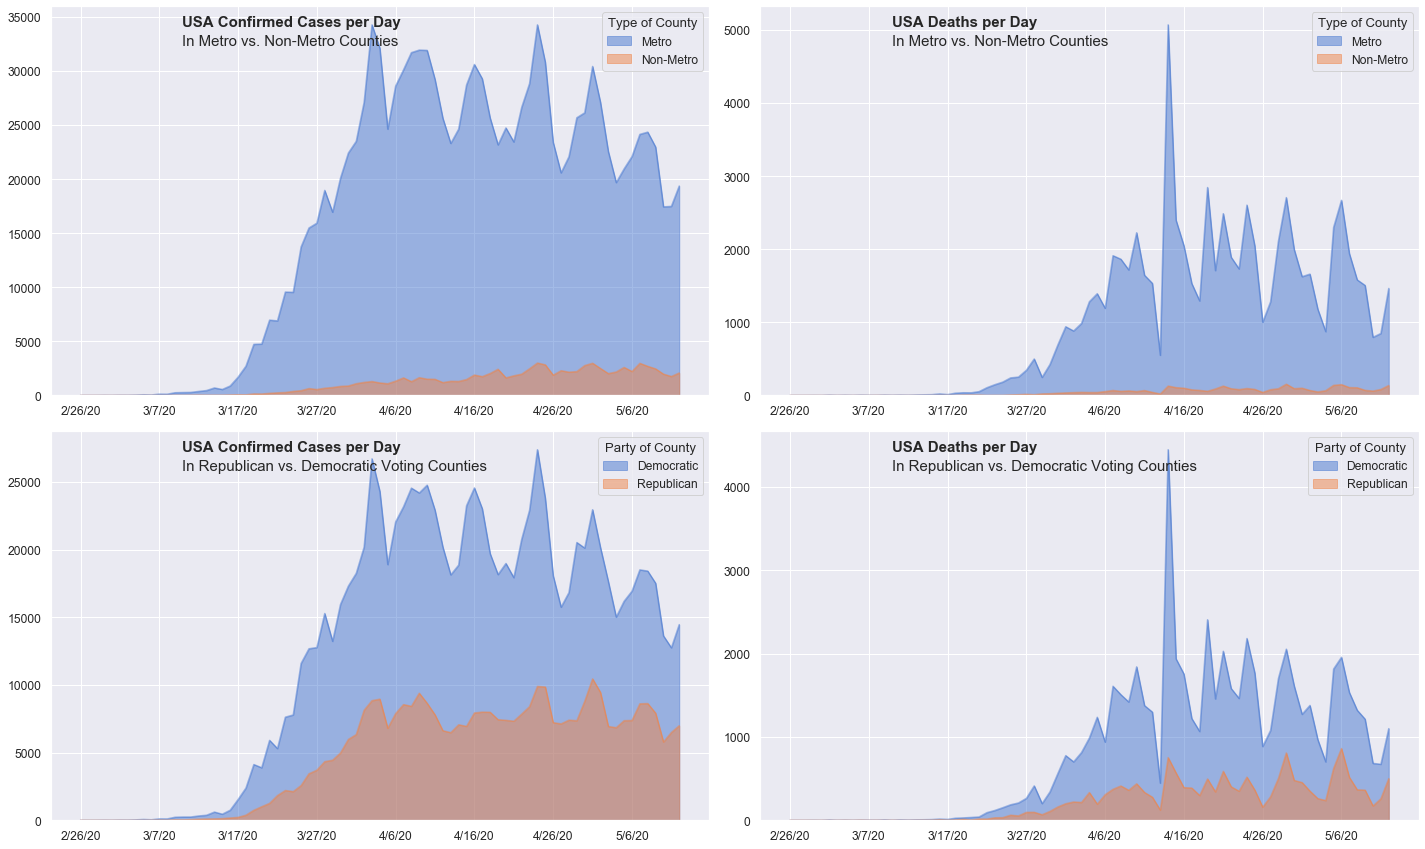

In [100]:
#plot the 4 charts - cases by urban/rural & then party, deaths by urban/rural & then party

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

CCmetroPD[35:].plot(kind='area', stacked=False, ax=axarr1, alpha=0.5)
axarr1.text(0.2, 0.95, 'USA Confirmed Cases per Day', fontsize=15, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.2, 0.9, 'In Metro vs. Non-Metro Counties', fontsize=15, transform=axarr1.transAxes)
CDmetroPD[35:].plot(kind='area', stacked=False, ax=axarr2, alpha=0.5)
axarr2.text(0.2, 0.95, 'USA Deaths per Day', fontsize=15, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.2, 0.9, 'In Metro vs. Non-Metro Counties', fontsize=15, transform=axarr2.transAxes)
CCpartyPD[35:].plot(kind='area', stacked=False, ax=axarr3, alpha=0.5)
axarr3.text(0.2, 0.95, 'USA Confirmed Cases per Day', fontsize=15, transform=axarr3.transAxes, fontweight='bold')
axarr3.text(0.2, 0.9, 'In Republican vs. Democratic Voting Counties', fontsize=15, transform=axarr3.transAxes)
CDpartyPD[35:].plot(kind='area', stacked=False, ax=axarr4, alpha=0.5)
axarr4.text(0.2, 0.95, 'USA Deaths per Day', fontsize=15, transform=axarr4.transAxes, fontweight='bold')
axarr4.text(0.2, 0.9, 'In Republican vs. Democratic Voting Counties', fontsize=15, transform=axarr4.transAxes)

plt.tight_layout()

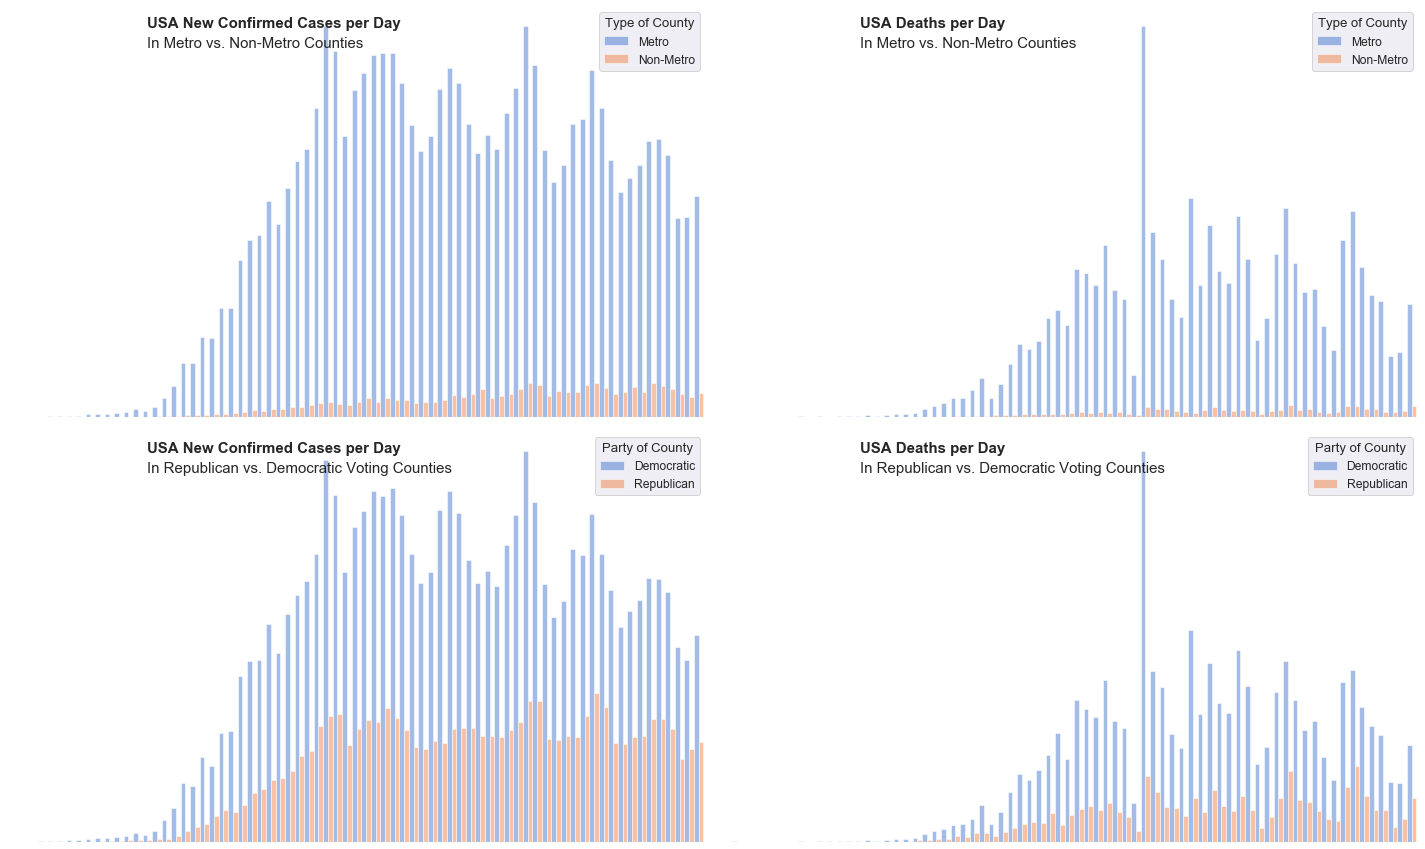

In [101]:
#plot the 4 charts - cases by urban/rural & then party, deaths by urban/rural & then party

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

CCmetroPD[39:].plot(kind='bar', ax=axarr1, alpha=0.5, width=1)
axarr1.text(0.2, 0.95, 'USA New Confirmed Cases per Day', fontsize=15, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.2, 0.9, 'In Metro vs. Non-Metro Counties', fontsize=15, transform=axarr1.transAxes)
CDmetroPD[39:].plot(kind='bar', ax=axarr2, alpha=0.5, width=1)
axarr2.text(0.2, 0.95, 'USA Deaths per Day', fontsize=15, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.2, 0.9, 'In Metro vs. Non-Metro Counties', fontsize=15, transform=axarr2.transAxes)
CCpartyPD[39:].plot(kind='bar', ax=axarr3, alpha=0.5, width=1)
axarr3.text(0.2, 0.95, 'USA New Confirmed Cases per Day', fontsize=15, transform=axarr3.transAxes, fontweight='bold')
axarr3.text(0.2, 0.9, 'In Republican vs. Democratic Voting Counties', fontsize=15, transform=axarr3.transAxes)
CDpartyPD[39:].plot(kind='bar', ax=axarr4, alpha=0.5, width=1)
axarr4.text(0.2, 0.95, 'USA Deaths per Day', fontsize=15, transform=axarr4.transAxes, fontweight='bold')
axarr4.text(0.2, 0.9, 'In Republican vs. Democratic Voting Counties', fontsize=15, transform=axarr4.transAxes)
axarr1.axis('off')
axarr2.axis('off')
axarr3.axis('off')
axarr4.axis('off')

plt.tight_layout()

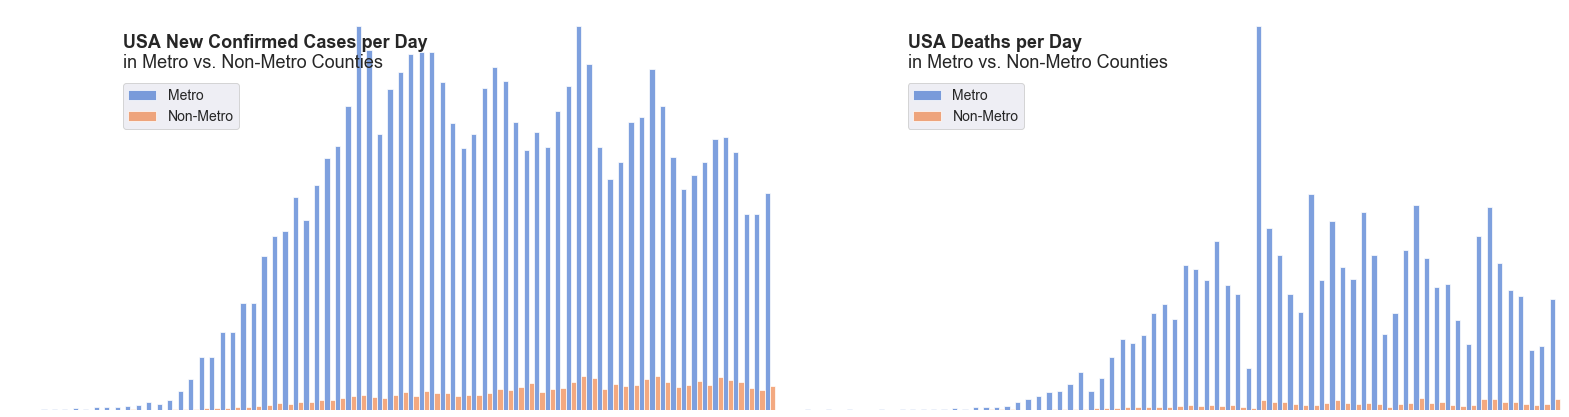

In [102]:
#plot  2 charts - cases by urban/rural & deaths by urban/rural

#Set up plot
fig, ((axarr1, axarr2)) = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

CCmetroPD[39:].plot(kind='bar', ax=axarr1, alpha=0.7, width=1)
axarr1.text(0.15, 0.9, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.15, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr1.transAxes)
CDmetroPD[39:].plot(kind='bar', ax=axarr2, alpha=0.7, width=1)
axarr2.text(0.15, 0.9, 'USA Deaths per Day', fontsize=18, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.15, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr2.transAxes)
axarr1.axis('off')
axarr1.legend(bbox_to_anchor=(0.15, 0.81), loc='upper left', borderaxespad=0., fontsize=14)
axarr2.axis('off')
axarr2.legend(bbox_to_anchor=(0.15, 0.81), loc='upper left', borderaxespad=0., fontsize=14)

plt.tight_layout()

In [103]:
# how many counties are rural vs. urban (or metro vs. non metro, defined by USDA)?
county_rural_urban['Type of County'].value_counts()
# there are 3221 counties: 1985 of them are non-metro and 1236 are metro 
# hence there are 60% more non-metro counties than metro counties
# the population in 2010 of metro counties is 266 million and non-metro is 46 million
# there are almost 6 times more people overall in metro vs. non-metro counties

Non-Metro    1985
Metro        1236
Name: Type of County, dtype: int64

In [104]:
#let's look at metro type in more detail, using 1-9 codes
county_confirmed_bymetro2 = county_confirmed.copy().drop(county_confirmed.columns[[1,2,3]], axis = 1)
county_deaths_bymetro2 = county_deaths.copy().drop(county_deaths.columns[[1,2,3]], axis = 1)
#this time, keep the urban code vs. metro & non-metro
UrbRur2 = county_rural_urban.copy().drop(county_rural_urban.columns[[1,2,3,5,6]], axis = 1).rename(columns={'FIPS': 'countyFIPS'})
county_confirmed_bymetro2 = county_confirmed_bymetro2.set_index('countyFIPS').join(UrbRur2.set_index('countyFIPS'))
county_deaths_bymetro2 = county_deaths_bymetro2.set_index('countyFIPS').join(UrbRur2.set_index('countyFIPS'))
#county_confirmed_bymetro2['RUCC_2013'].apply(str)
CCmetro2 = county_confirmed_bymetro2.groupby('RUCC_2013').sum().transpose()
CDmetro2 = county_deaths_bymetro2.groupby('RUCC_2013').sum().transpose()
#the above is cumulative - let's look at  confirmed cases & deaths per day
CCmetroPD2 = CCmetro2.copy()
CDmetroPD2 = CDmetro2.copy()
CCmetroPD2[1] = CCmetroPD2[1][1:] - CCmetroPD2[1][:-1].values
CDmetroPD2[1] = CDmetroPD2[1][1:] - CDmetroPD2[1][:-1].values
CCmetroPD2[2] = CCmetroPD2[2][1:] - CCmetroPD2[2][:-1].values
CDmetroPD2[2] = CDmetroPD2[2][1:] - CDmetroPD2[2][:-1].values
CCmetroPD2[3] = CCmetroPD2[3][1:] - CCmetroPD2[3][:-1].values
CDmetroPD2[3] = CDmetroPD2[3][1:] - CDmetroPD2[3][:-1].values
CCmetroPD2[4] = CCmetroPD2[4][1:] - CCmetroPD2[4][:-1].values
CDmetroPD2[4] = CDmetroPD2[4][1:] - CDmetroPD2[4][:-1].values
CCmetroPD2[5] = CCmetroPD2[5][1:] - CCmetroPD2[5][:-1].values
CDmetroPD2[5] = CDmetroPD2[5][1:] - CDmetroPD2[5][:-1].values
CCmetroPD2[6] = CCmetroPD2[6][1:] - CCmetroPD2[6][:-1].values
CDmetroPD2[6] = CDmetroPD2[6][1:] - CDmetroPD2[6][:-1].values
CCmetroPD2[7] = CCmetroPD2[7][1:] - CCmetroPD2[7][:-1].values
CDmetroPD2[7] = CDmetroPD2[7][1:] - CDmetroPD2[7][:-1].values
CCmetroPD2[8] = CCmetroPD2[8][1:] - CCmetroPD2[8][:-1].values
CDmetroPD2[8] = CDmetroPD2[8][1:] - CDmetroPD2[8][:-1].values
CCmetroPD2[9] = CCmetroPD2[9][1:] - CCmetroPD2[9][:-1].values
CDmetroPD2[9] = CDmetroPD2[9][1:] - CDmetroPD2[9][:-1].values
CCmetroPD2 = CCmetroPD2.replace([np.inf, -np.inf], np.nan).fillna(0)
CDmetroPD2 = CDmetroPD2.replace([np.inf, -np.inf], np.nan).fillna(0)
CCmetroPD2[CCmetroPD2 < 0] = 0
CDmetroPD2[CDmetroPD2 < 0] = 0


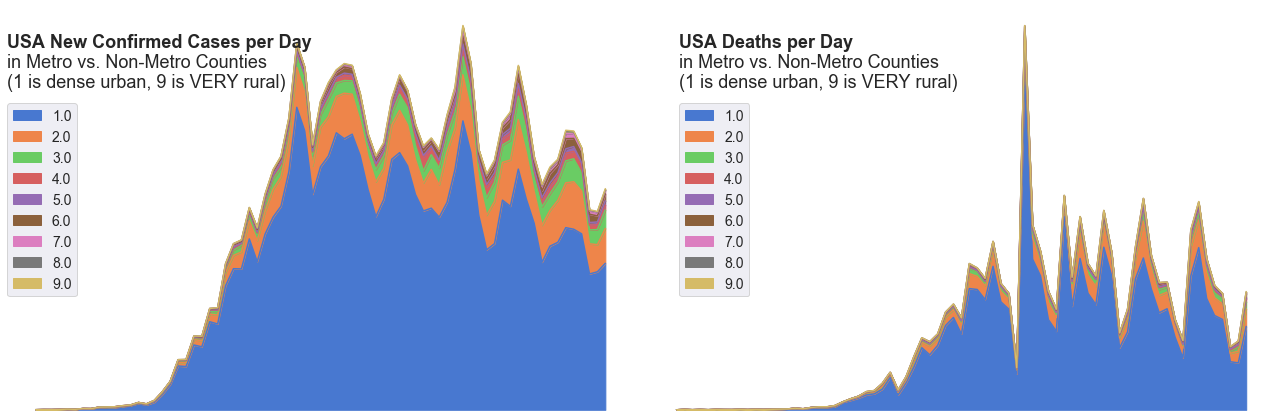

In [105]:
#plot  2 charts - cases by urban code & deaths by urban code

sns.set_palette(sns.color_palette("muted",9))

#Set up plot
fig, ((axarr1, axarr2)) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

CCmetroPD2[39:].plot(kind='area', ax=axarr1, alpha=1)
axarr1.text(0.0, 0.9, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.0, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr1.transAxes)
axarr1.text(0.0, 0.8, '(1 is dense urban, 9 is VERY rural)', fontsize=18, transform=axarr1.transAxes)
CDmetroPD2[39:].plot(kind='area', ax=axarr2, alpha=1)
axarr2.text(0.05, 0.9, 'USA Deaths per Day', fontsize=18, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.05, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr2.transAxes)
axarr2.text(0.05, 0.8, '(1 is dense urban, 9 is VERY rural)', fontsize=18, transform=axarr2.transAxes)
axarr1.axis('off')
axarr1.legend(bbox_to_anchor=(0.0, 0.76), loc='upper left', borderaxespad=0., fontsize=14)
axarr2.axis('off')
axarr2.legend(bbox_to_anchor=(0.05, 0.76), loc='upper left', borderaxespad=0., fontsize=14)

plt.tight_layout()

In [106]:
#how many counties of each type?
county_rural_urban['RUCC_2013'].value_counts(sort=False)[[1,2,3,4,5,6,7,8,9]]

1    472
2    395
3    369
4    217
5     92
6    597
7    434
8    220
9    425
Name: RUCC_2013, dtype: int64

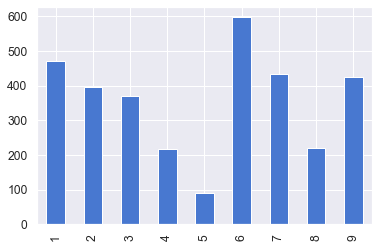

In [107]:
#plot that...
county_rural_urban['RUCC_2013'].value_counts(sort=False)[[1,2,3,4,5,6,7,8,9]].plot(kind='bar')

In [108]:
#what's the population of metro vs. non-metro counties - by state?
pd.pivot_table(county_rural_urban, values='Population_2010', index=['Type of County'], aggfunc=np.sum)/1000000

,Population_2010
Type of County,
Metro,266.019656
Non-Metro,46.451671


In [109]:
#what's the population of metro vs. non-metro counties - by state?
county_pops = pd.pivot_table(county_rural_urban, values='Population_2010', index=['Type of County'],
                    columns=['State'], aggfunc=np.sum)/1000000

county_pops

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Type of County,,,,,,,,,,,,,,,,,,,,,
Metro,0.478402,3.608396,1.752413,6.045887,36.408727,4.341903,3.384170,0.601723,0.897934,18.094312,...,0.377258,4.858864,22.140398,2.462613,6.928729,0.211261,6.019776,4.178924,1.132502,0.167188
Non-Metro,0.231829,1.171340,1.163505,0.346130,0.845229,0.687293,0.189927,NaN,NaN,0.706998,...,0.436922,1.487241,3.005163,0.301272,1.072295,0.414480,0.704764,1.508062,0.720492,0.396438


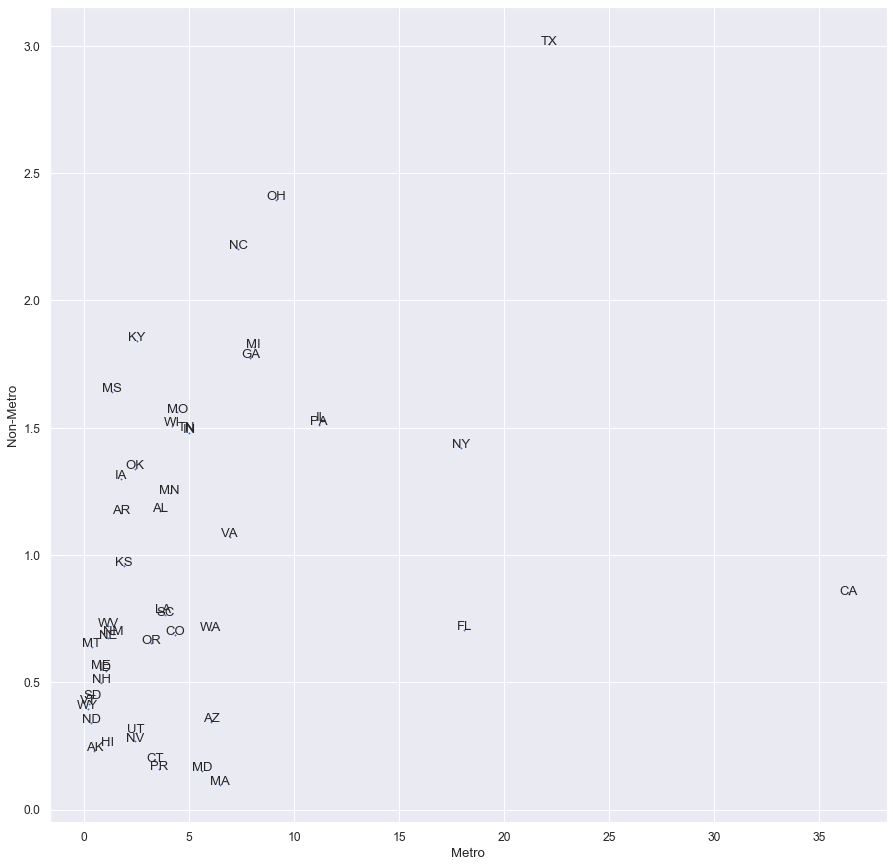

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

CP = county_pops.transpose()
ax = sns.scatterplot(x="Metro", y="Non-Metro", marker=".", data=CP)

for i in range(len(CP)):
    ax.annotate(CP.index[i], (CP['Metro'][i], CP['Non-Metro'][i]), ha='center')

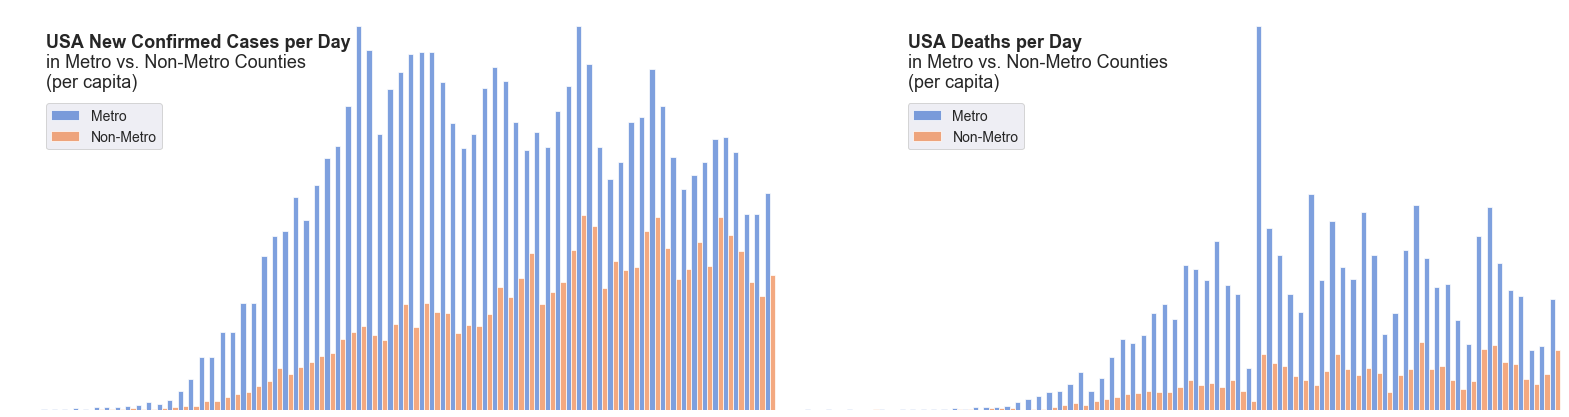

In [111]:
#plot  2 charts - cases by urban/rural & deaths by urban/rural - but scale non-metro based on relative population
scaling = 266/46 #266M vs 46M

CCmetroPD_scaled = CCmetroPD.copy()
CDmetroPD_scaled = CDmetroPD.copy()
CCmetroPD_scaled['Non-Metro'] = CCmetroPD_scaled['Non-Metro']*scaling
CDmetroPD_scaled['Non-Metro'] = CDmetroPD_scaled['Non-Metro']*scaling

#Set up plot
fig, ((axarr1, axarr2)) = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

CCmetroPD_scaled[39:].plot(kind='bar', ax=axarr1, alpha=0.7, width=1)
axarr1.text(0.05, 0.9, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.05, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr1.transAxes)
axarr1.text(0.05, 0.8, '(per capita)', fontsize=18, transform=axarr1.transAxes)
axarr1.axis('off')
axarr1.legend(bbox_to_anchor=(0.05, 0.76), loc='upper left', borderaxespad=0., fontsize=14)
CDmetroPD_scaled[39:].plot(kind='bar', ax=axarr2, alpha=0.7, width=1)
axarr2.text(0.15, 0.9, 'USA Deaths per Day', fontsize=18, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.15, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr2.transAxes)
axarr2.text(0.15, 0.8, '(per capita)', fontsize=18, transform=axarr2.transAxes)
axarr2.axis('off')
axarr2.legend(bbox_to_anchor=(0.15, 0.76), loc='upper left', borderaxespad=0., fontsize=14)

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-US-counties-urban-vs-rural-per-capita.png'
fig.savefig(datestring)

In [112]:
#total sonfirmed cases metro vs. non-metro
CCmetroPD.sum()

Type of County
Metro        1265605.0
Non-Metro      87779.0
dtype: float64

In [113]:
#total deaths metro vs. non-metro
CDmetroPD.sum()

Type of County
Metro        76703.0
Non-Metro     3443.0
dtype: float64

In [114]:
CCmetroPD_scaled_ratio = CCmetroPD_scaled.copy()
CDmetroPD_scaled_ratio = CDmetroPD_scaled.copy()

In [115]:
def scalify(dataf):
    for i in dataf.index:
        if dataf['Metro'][i] == 0:
            if dataf['Non-Metro'][i] == 0:
                scale = 1
            else:
                dataf['Non-Metro'][i] =100
        else:
            if dataf['Non-Metro'][i] == 0:
                dataf['Metro'][i] =100
            else:
                total = dataf['Non-Metro'][i]+dataf['Metro'][i]
                dataf['Metro'][i] = dataf['Metro'][i]/total * 100
                dataf['Non-Metro'][i] = dataf['Non-Metro'][i]/total * 100
    return dataf

scalify(CCmetroPD_scaled_ratio)
scalify(CDmetroPD_scaled_ratio)

Type of County,Metro,Non-Metro
1/22/20,0.000000,0.000000
1/23/20,0.000000,0.000000
1/24/20,0.000000,0.000000
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
5/8/20,72.252027,27.747973
5/9/20,78.804781,21.195219
5/10/20,69.617362,30.382638
5/11/20,64.136797,35.863203


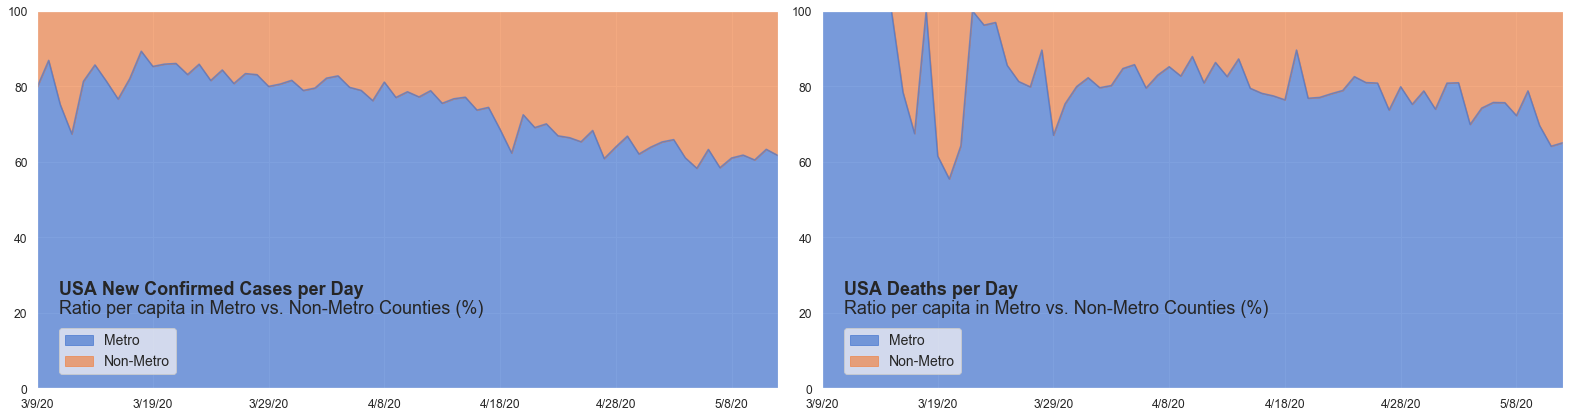

In [116]:
#Set up plot
fig, ((axarr1, axarr2)) = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
start_date = 47 #change this as desired

CCmetroPD_scaled_ratio[start_date:].plot(kind='area', ax=axarr1, alpha=0.7)
axarr1.text(0.03, 0.25, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.03, 0.2, 'Ratio per capita in Metro vs. Non-Metro Counties (%)', fontsize=18, transform=axarr1.transAxes)
#axarr1.axis('off')
axarr1.legend(bbox_to_anchor=(0.03, 0.16), loc='upper left', borderaxespad=0., fontsize=14)
#CDmetroPD_scaled_ratio[start_date:].plot(kind='area', ax=axarr2, alpha=0.7, sharey=axarr1)
CDmetroPD_scaled_ratio[start_date:].plot(kind='area', ax=axarr2, alpha=0.7)
axarr2.text(0.03, 0.25, 'USA Deaths per Day', fontsize=18, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.03, 0.2, 'Ratio per capita in Metro vs. Non-Metro Counties (%)', fontsize=18, transform=axarr2.transAxes)
#axarr2.axis('off')
axarr2.legend(bbox_to_anchor=(0.03, 0.16), loc='upper left', borderaxespad=0., fontsize=14)
axarr1.set_ylim([0,100])
axarr2.set_ylim([0,100])
axarr1.set_xlim([0,CDmetroPD_scaled_ratio.shape[0]-(start_date+1)])
axarr2.set_xlim([0,CDmetroPD_scaled_ratio.shape[0]-(start_date+1)])
# axarr1.set_xlim([0,49])
# axarr2.set_xlim([0,49])


plt.tight_layout()

# datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-US-counties-urban-vs-rural-per-capita-ratios.png'
# fig.savefig(datestring)

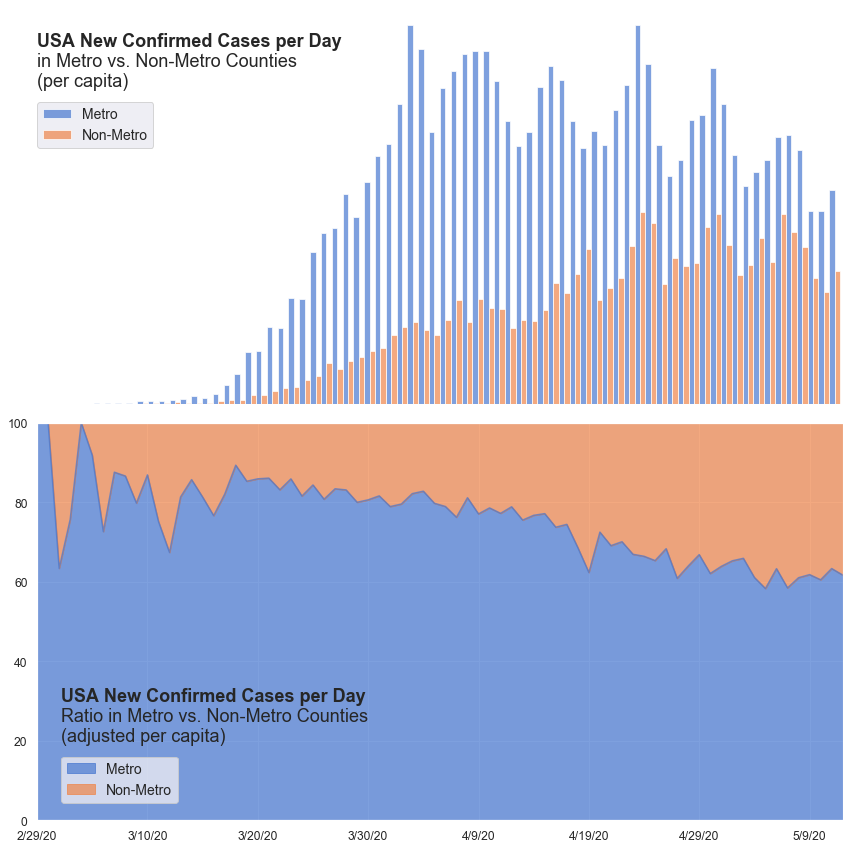

In [117]:
start_date = 38 #change this as desired

fig, ((axarr1, axarr2)) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

CCmetroPD_scaled[start_date:].plot(kind='bar', ax=axarr1, alpha=0.7, width=1)
axarr1.text(0.0, 0.9, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr1.transAxes, fontweight='bold')
axarr1.text(0.0, 0.85, 'in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr1.transAxes)
axarr1.text(0.0, 0.8, '(per capita)', fontsize=18, transform=axarr1.transAxes)
axarr1.axis('off')
axarr1.legend(bbox_to_anchor=(0.0, 0.76), loc='upper left', borderaxespad=0., fontsize=14)

CCmetroPD_scaled_ratio[start_date:].plot(kind='area', ax=axarr2, alpha=0.7)
axarr2.text(0.03, 0.3, 'USA New Confirmed Cases per Day', fontsize=18, transform=axarr2.transAxes, fontweight='bold')
axarr2.text(0.03, 0.25, 'Ratio in Metro vs. Non-Metro Counties', fontsize=18, transform=axarr2.transAxes)
axarr2.text(0.03, 0.2, '(adjusted per capita)', fontsize=18, transform=axarr2.transAxes)
axarr2.legend(bbox_to_anchor=(0.03, 0.16), loc='upper left', borderaxespad=0., fontsize=14)
#CDmetroPD_scaled_ratio[start_date:].plot(kind='area', ax=axarr2, alpha=0.7, sharey=axarr1)

#axarr1.set_ylim([0,100])
axarr2.set_ylim([0,100])
#axarr1.set_xlim([0,CDmetroPD_scaled_ratio.shape[0]-(start_date+1)])
axarr2.set_xlim([0,CDmetroPD_scaled_ratio.shape[0]-(start_date+1)])

plt.tight_layout()

datestring = 'charts/' + str(Date.strftime("%Y%m%d")) + '-US-counties-urban-vs-rural-per-capita.png'
fig.savefig(datestring)